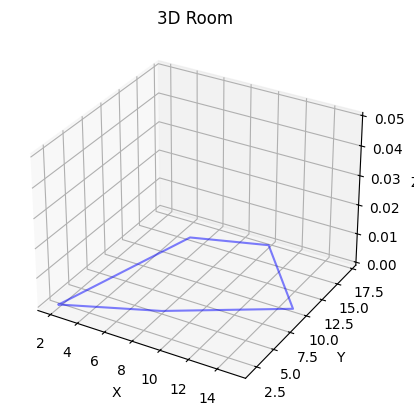

In [7]:
import random
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


class Room:
    def __init__(self, width, length, height, shape_vertices):
        """a room class for the drone to navigate in 

        Args:
            width (int): the width of the room
            length (int): the length of the room
            shape_vertices (class): a polygon class that provides the shape of the random area
        """
        self.width = width
        self.length = length
        self.height = height
        self.shape = Polygon(shape_vertices)
        
    def is_inside(self, x, y):
        point = Point(x, y, 0)
        return self.shape.contains(point)

    def plot_room(self):
        # Create figure and axis for 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Extract coordinates of the polygon vertices
        x, y = self.shape.exterior.xy

        # Fill the polygon in 3D
        ax.plot(x, y, zs=0, zdir='z', color='b', alpha=0.5)

        # Set plot labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Room')

        # set Z limit
        ax.set_zlim(0, None)
        
        # Show plot
        plt.show()
        
width = 20
length = 20
height = 20
shape_vertices = [(2, 2), (8, 5), (15, 10), (10, 17), (5, 15)]  # Example shape vertices

room = Room(width, length, height, shape_vertices)
room.plot_room()